In [57]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.linear_model import LinearRegression

In [58]:
sample_submission = pd.read_csv("C:/Kaggle/House_prices/sample_submission.csv")
train = pd.read_csv("C:/Kaggle/House_prices/train.csv")
test = pd.read_csv("C:/Kaggle/House_prices/test.csv")
sample_submission.dropna()
train = train.dropna(axis=1)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

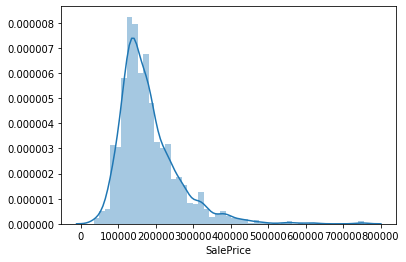

In [59]:
sns.distplot(train["SalePrice"])
stats.shapiro(train["SalePrice"])
test.columns

In [60]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
# choose cov to insert in the model
covariates = ["SaleCondition", "HouseStyle"]

columns = list(train.columns)
covToTest = columns[:-1]

for cov in covToTest:
  y = np.array(train["SalePrice"])
  x = np.array(train[cov])
  # find unique group labels and their corresponding indices
  label, idx = np.unique(x, return_inverse=True)
  # make a list of arrays containing the y-values corresponding to each unique label
  groups = [y[idx == i] for i, l in enumerate(label)]
  H, p = stats.kruskal(*groups)
  p = p.item()
  if (p < 0.05):
    covariates.append(cov)
   
  covariatesDF = train[covariates]
  XCurrent = pd.get_dummies(covariatesDF)  # values converts it into a numpy array
  Y = train["SalePrice"] # -1 means that calculate the dimension of rows, but have 1 column
  regrCurrent = OLS(y, add_constant(XCurrent)).fit()
  aicCurrent = regrCurrent.aic
    
  CovariatesDFBefore = covariates[:-1]
  CovariatesDFBefore = train[CovariatesDFBefore]
  XBefore = pd.get_dummies(CovariatesDFBefore) 
  regrBefore = OLS(y, add_constant(XBefore)).fit()
  aicBefore = regrBefore.aic 
  
  if (aicBefore < aicCurrent and p < 0.05):
    print(cov + " has an effect on the price of the house"+ " p-value <" + str(p) +  " However " + cov + " Does not improve the model")
    del covariates[-1]

covariates.remove("SaleCondition")
covariates.remove("HouseStyle")

LotConfig has an effect on the price of the house p-value <3.297912123318503e-07 However LotConfig Does not improve the model
ExterCond has an effect on the price of the house p-value <1.8323647163959772e-09 However ExterCond Does not improve the model
Foundation has an effect on the price of the house p-value <2.169096402016262e-103 However Foundation Does not improve the model
CentralAir has an effect on the price of the house p-value <5.319641624535031e-33 However CentralAir Does not improve the model
BsmtFullBath has an effect on the price of the house p-value <6.005945476684253e-16 However BsmtFullBath Does not improve the model
FullBath has an effect on the price of the house p-value <1.3843139338847373e-129 However FullBath Does not improve the model
HalfBath has an effect on the price of the house p-value <1.151989275905872e-39 However HalfBath Does not improve the model
GarageArea has an effect on the price of the house p-value <2.071606280997242e-46 However GarageArea Does no

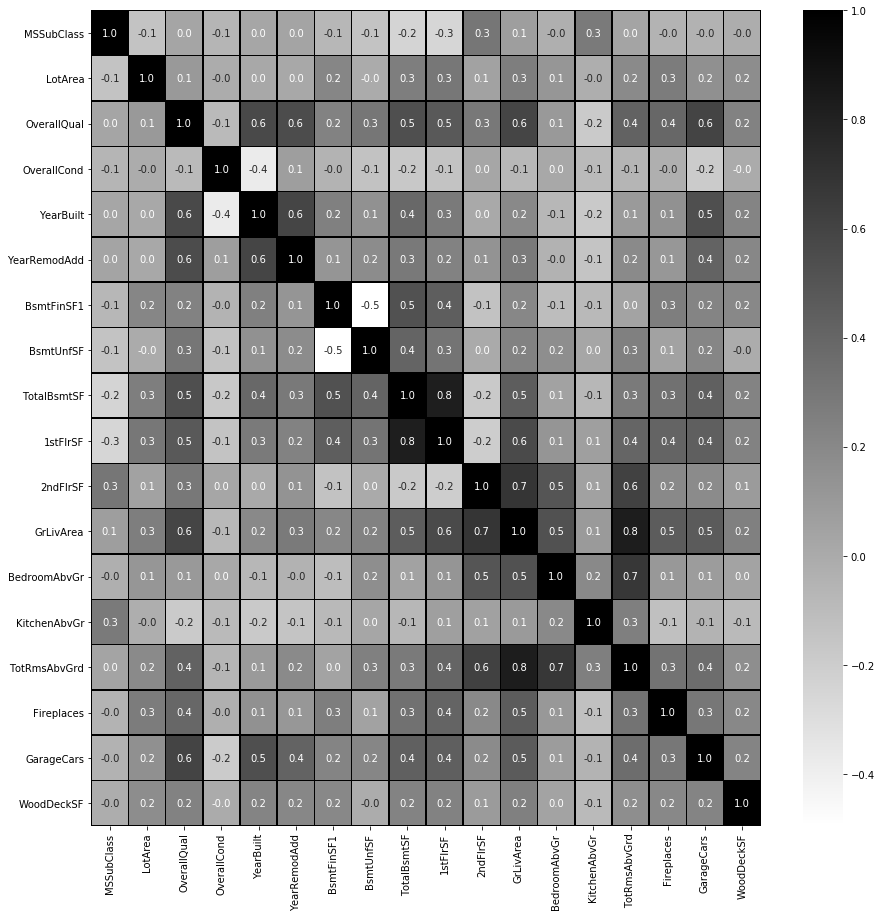

['MSSubClass',
 'MSZoning',
 'LotArea',
 'LotShape',
 'LandContour',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'SaleType',
 'SaleCondition']

In [61]:
# see which covariates are correlated
covariatesDF = train[covariates]
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(covariatesDF.corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.1f',ax=ax, cmap='gray_r')
plt.show()
covariates

In [64]:
# Train the model and make predictions
X = pd.get_dummies(covariatesDF)  # values converts it into a numpy array
Y = train["SalePrice"] # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
test = pd.get_dummies(test) 
Y_pred = linear_regressor.predict(X)  # make predictions
list(train["SalePrice"][0:15])

[208500,
 181500,
 223500,
 140000,
 250000,
 143000,
 307000,
 200000,
 129900,
 118000,
 129500,
 345000,
 144000,
 279500,
 157000]

In [65]:
list(Y_pred[0:15])

[210650.50945002807,
 201224.63328257704,
 213098.22997819132,
 172067.4903875211,
 301953.56457830465,
 172666.79024248628,
 267204.18863699783,
 223017.5952346184,
 138245.4272554979,
 128829.0543607393,
 134720.85241104022,
 403235.51764961064,
 135165.6293915409,
 226339.81816328235,
 158458.6822909125]

In [66]:
#Calculate the accuracy of the model
print('Coefficients: \n', linear_regressor.coef_)
# The mean squared error
print("Mean squared error: %.2f" % np.mean((linear_regressor.predict(X) - Y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % linear_regressor.score(X, Y))

Coefficients: 
 [-2.48079512e+01  5.00685534e-01  8.03836250e+03  4.89498862e+03
  3.40786109e+02  1.07001756e+02  1.29321478e+01 -1.04063426e+01
  2.41996055e+01  1.64357579e+01  3.04338130e+01  4.50087547e+01
 -5.72696996e+03 -1.38111288e+04  1.21182605e+03  2.84774924e+03
  7.25850472e+03  1.11246328e+01 -2.45320923e+04  8.88494152e+03
  5.42912194e+03  6.28995114e+03  3.92807767e+03 -2.30117141e+03
  2.61437085e+03  2.81218930e+03 -3.12538874e+03 -6.46354342e+03
  1.00909274e+04 -4.64572062e+03  1.01833665e+03 -1.16044861e+03
 -1.97892409e+03  9.53431262e+03  2.23818392e+03 -1.13493132e+04
 -7.23629429e+03  1.08331209e+04 -1.29381966e+04 -1.32615750e+04
 -1.10314283e+03 -8.56557311e+01 -1.56600615e+04 -1.32816894e+04
  9.90646195e+03 -1.78506666e+04  3.03449970e+04  2.50429087e+04
 -1.07914265e+04 -6.94578883e+03 -8.86565186e+03 -5.07189231e+03
  4.68987577e+03  3.94071170e+04 -8.29743885e+03  3.88118836e+03
 -7.07360459e+02  6.71875660e+02  9.19075041e+03  2.39313904e+03
  3.84560